In [8]:
from __future__ import absolute_import, division, print_function
#@title Imports and Global Variables  { display-mode: "form" }
"""
The book uses a custom matplotlibrc file, which provides the unique styles for
matplotlib plots. If executing this book, and you wish to use the book's
styling, provided are two options:
    1. Overwrite your own matplotlibrc file with the rc-file provided in the
       book's styles/ dir. See http://matplotlib.org/users/customizing.html
    2. Also in the styles is  bmh_matplotlibrc.json file. This can be used to
       update the styles in only this notebook. Try running the following code:

        import json
        s = json.load(open("../styles/bmh_matplotlibrc.json"))
        matplotlib.rcParams.update(s)
"""
!pip3 install -q pandas_datareader
!pip3 install -q wget



warning_status = "ignore" #@param ["ignore", "always", "module", "once", "default", "error"]
import warnings
warnings.filterwarnings(warning_status)
with warnings.catch_warnings():
    warnings.filterwarnings(warning_status, category=DeprecationWarning)
    warnings.filterwarnings(warning_status, category=UserWarning)

import numpy as np
import os
#@markdown This sets the styles of the plotting (default is styled like plots from [FiveThirtyeight.com](https://fivethirtyeight.com/))
matplotlib_style = 'fivethirtyeight' #@param ['fivethirtyeight', 'bmh', 'ggplot', 'seaborn', 'default', 'Solarize_Light2', 'classic', 'dark_background', 'seaborn-colorblind', 'seaborn-notebook']
import matplotlib as mpl
import matplotlib.pyplot as plt; plt.style.use(matplotlib_style)
import matplotlib.axes as axes;
from matplotlib.patches import Ellipse
from mpl_toolkits.mplot3d import Axes3D
import pandas_datareader.data as web
%matplotlib inline
import seaborn as sns; sns.set_context('notebook')
from IPython.core.pylabtools import figsize
#@markdown This sets the resolution of the plot outputs (`retina` is the highest resolution)
notebook_screen_res = 'retina' #@param ['retina', 'png', 'jpeg', 'svg', 'pdf']
%config InlineBackend.figure_format = notebook_screen_res

#-----------
import tensorflow as tf
#tfe = tf.contrib.eager

# Eager Execution
#@markdown Check the box below if you want to use [Eager Execution](https://www.tensorflow.org/guide/eager)
#@markdown Eager execution provides An intuitive interface, Easier debugging, and a control flow comparable to Numpy. You can read more about it on the [Google AI Blog](https://ai.googleblog.com/2017/10/eager-execution-imperative-define-by.html)
use_tf_eager = False #@param {type:"boolean"}

# Use try/except so we can easily re-execute the whole notebook.
if use_tf_eager:
    try:
        tf.compat.v1.enable_eager_execution()
    except:
        pass

import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

  
def evaluate(tensors):
    """Evaluates Tensor or EagerTensor to Numpy `ndarray`s.
    Args:
    tensors: Object of `Tensor` or EagerTensor`s; can be `list`, `tuple`,
      `namedtuple` or combinations thereof.
 
    Returns:
      ndarrays: Object with same structure as `tensors` except with `Tensor` or
        `EagerTensor`s replaced by Numpy `ndarray`s.
    """
    if tf.executing_eagerly():
        return tf.nest.pack_sequence_as(
            tensors,
            [t.numpy() if tf.is_tensor(t) else t
             for t in tf.nest.flatten(tensors)])
    return sess.run(tensors)

class _TFColor(object):
    """Enum of colors used in TF docs."""
    red = '#F15854'
    blue = '#5DA5DA'
    orange = '#FAA43A'
    green = '#60BD68'
    pink = '#F17CB0'
    brown = '#B2912F'
    purple = '#B276B2'
    yellow = '#DECF3F'
    gray = '#4D4D4D'
    def __getitem__(self, i):
        return [
            self.red,
            self.orange,
            self.green,
            self.blue,
            self.pink,
            self.brown,
            self.purple,
            self.yellow,
            self.gray,
        ][i % 9]
TFColor = _TFColor()

def session_options(enable_gpu_ram_resizing=True, enable_xla=True):
    """
    Allowing the notebook to make use of GPUs if they're available.
    
    XLA (Accelerated Linear Algebra) is a domain-specific compiler for linear 
    algebra that optimizes TensorFlow computations.
    """
    config = tf.compat.v1.ConfigProto()
    config.log_device_placement = True
    if enable_gpu_ram_resizing:
        # `allow_growth=True` makes it possible to connect multiple colabs to your
        # GPU. Otherwise the colab malloc's all GPU ram.
        config.gpu_options.allow_growth = True
    if enable_xla:
        # Enable on XLA. https://www.tensorflow.org/performance/xla/.
        config.graph_options.optimizer_options.global_jit_level = (
            tf.compat.v1.OptimizerOptions.ON_1)
    return config


def reset_sess(config=None):
    """
    Convenience function to create the TF graph & session or reset them.
    """
    if config is None:
        config = session_options()
    global sess
    tf.compat.v1.reset_default_graph()
    try:
        sess.close()
    except:
        pass
    sess = tf.compat.v1.InteractiveSession(config=config)
    
reset_sess()

Device mapping: no known devices.


In [9]:
print("Tensorflow Version: ", tf.__version__)
print("Tensorflow Probability Version: ", tfp.__version__)

Tensorflow Version:  2.9.2
Tensorflow Probability Version:  0.16.0


In [ ]:
sys.path.append('./Hessian-paper/Geophysics/GP_old')
sys.path.append('./Hessian-paper/Geophysics/models')

In [10]:
import file as file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

ModuleNotFoundError: ignored

In [ ]:
sub2 =  [
        [[[0.0, 2, 0], [3, 2, -2], [6, 2, -5], [7, 2, -8], [9, 2, -10], [15, 2, -14]],
        [[0.0, 5, 0], [3, 5, -3], [6, 5, -5], [7, 5, -9], [9, 5, -12], [15, 5, -15]],
        [[0.0, 10, 0], [3, 10, -2], [6, 10, -5], [7, 10, -8], [9, 10, -11], [15, 10, -16]],
        [[0.0, 15, -1.0], [3, 15, -4], [6, 15, -6], [7, 15, -8], [9, 15, -11.5], [15, 15, -15]],
        [[0.0, 20, 1.0], [3, 20, -2], [6, 20, -4], [7, 20, -8], [9, 20, -11], [15, 20, -16]]],

        [[[0.0, 2, 3], [3, 2, 1], [6, 2, -2], [7, 2, -5], [9, 2, -7], [15, 2, -11]],
        [[0.0, 5, 3], [3, 5, 0], [6, 5, -2], [7, 5, -6], [9, 5, -9], [15, 5, -12]],
        [[0.0, 10, 3], [3, 10, 1], [6, 10, -2], [7, 10, -5], [9, 10, -8], [15, 10, -13]],
        [[0.0, 15, 2.0], [3, 15, -1], [6, 15, -3], [7, 15, -5], [9, 15, -8.5], [15, 15, -12]],
        [[0.0, 20, 4.0], [3, 20, 1], [6, 20, -1], [7, 20, -5], [9, 20, -8], [15, 20, -13]]]
        ]

In [ ]:
w = 1
data = file.read_data(sub2, w)

In [ ]:
subdivision_data = data.visualize_interactive(400, 400)

1.5087149143218994


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [ ]:
density = 2
# manifold = data.combine_mesh() # disaster
volumetrics = data.volumetric_mesh(density, 1)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

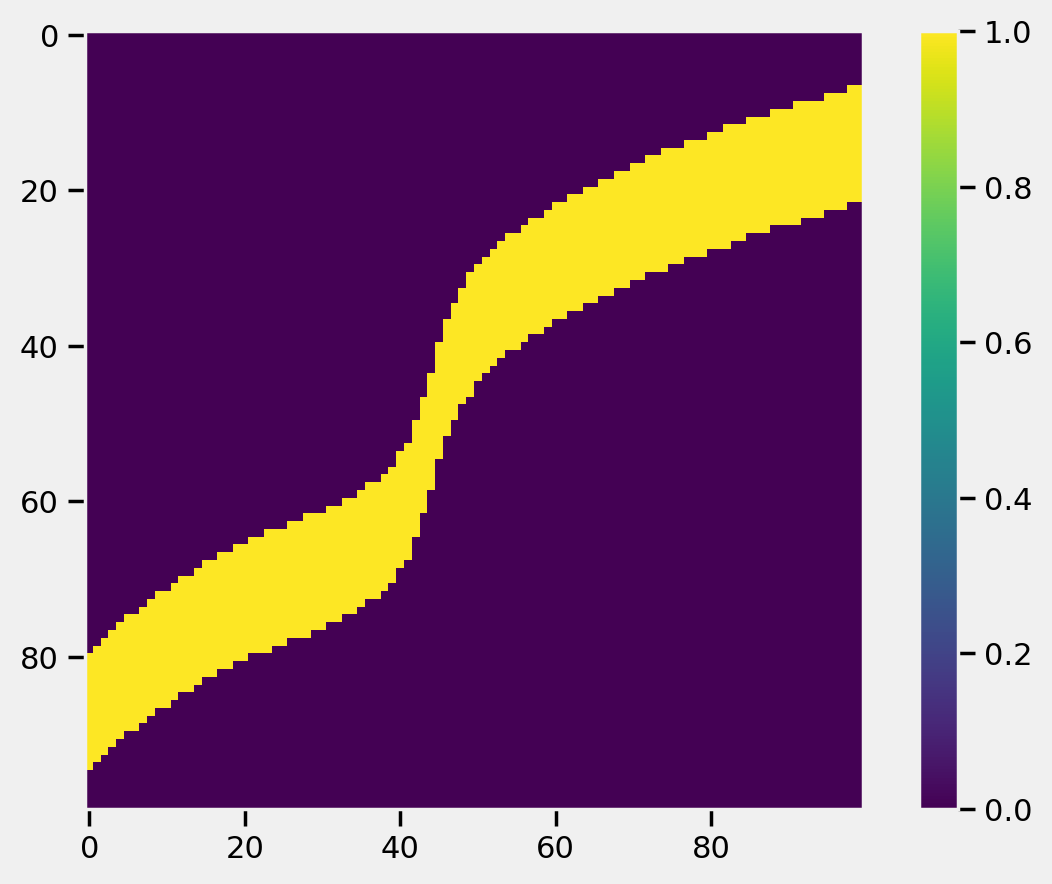

In [ ]:
volume_voxel = data.vol_voxelization_2()

In [ ]:
iteration = 2
lith_block_MC = data.gaussian_MC(400, 400, density, iteration)
#lith_block_MCMC = data.simulation_MCMC(400, 400, density)

In [ ]:
simulation = data.simulation()

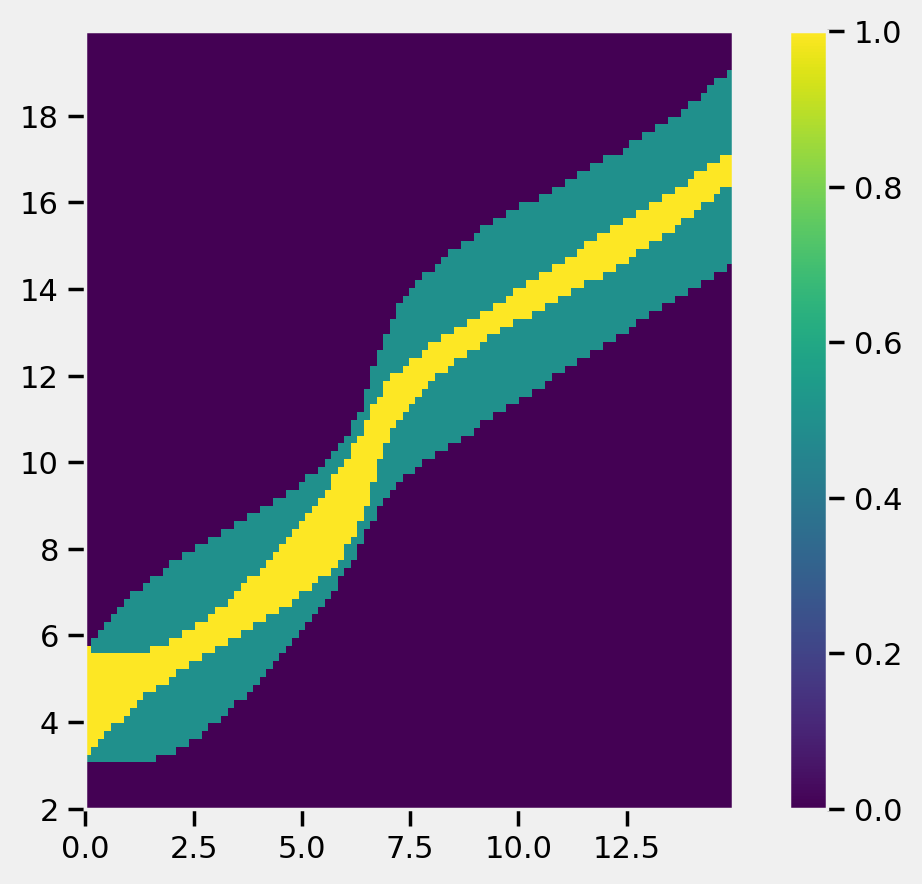

In [ ]:
probability = data.probability()

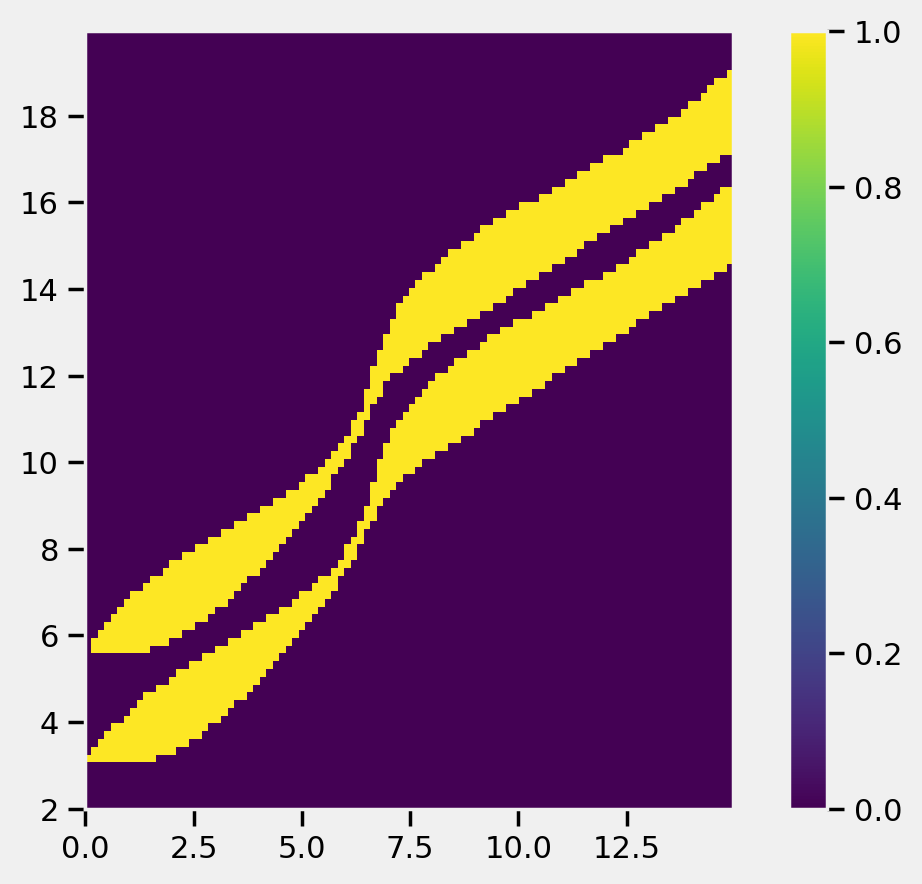

In [ ]:
entropy = data.entropy()

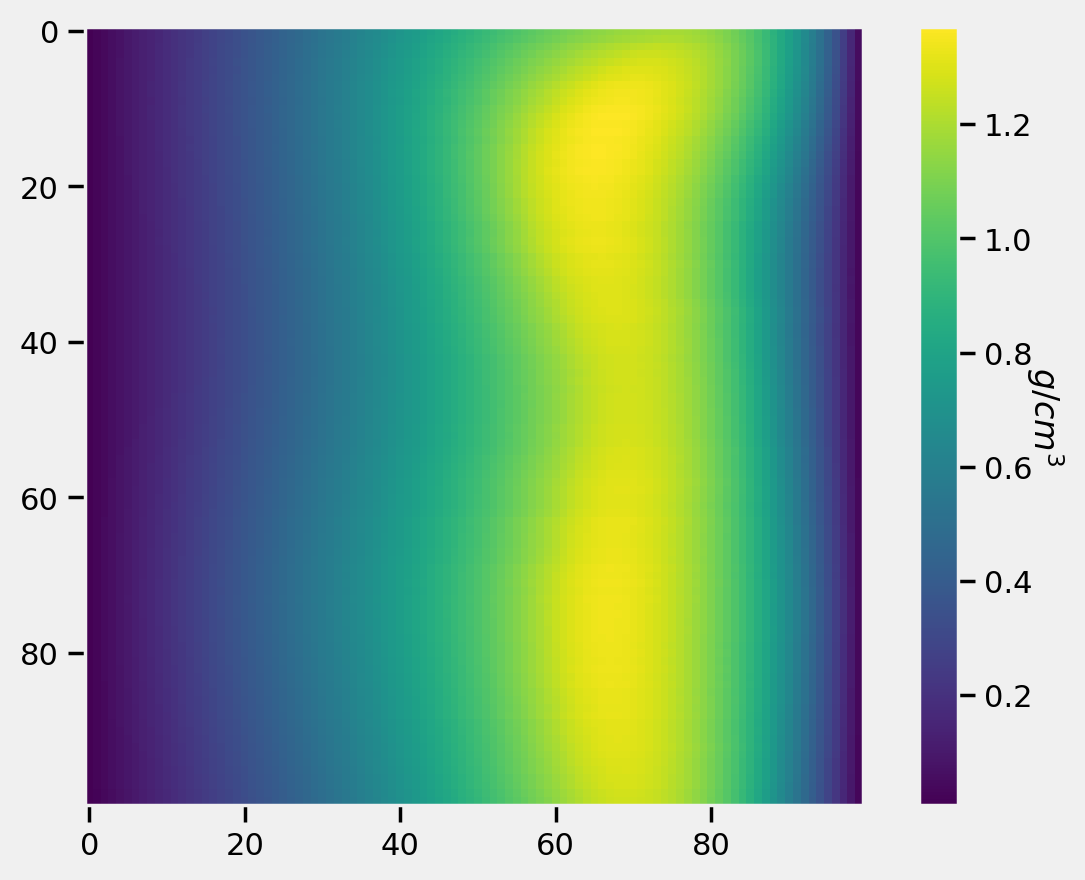

In [ ]:
viz_gravity = data.visualize_geo()

## MCMC
- For MCMC - Our constraints on the model are thickness and gravity
- No size because we will be using tensorflow MCMC 

In [ ]:
sim_mcmc = data.gaussian_MCMC(density)

160000
160000


In [ ]:
r = np.array([[[1, 3, 5, 2], [2, 4, 7, 1], [7, 2, 1, 8]],
              [[1, 3, 5, 2], [2, 4, 7, 1], [7, 2, 1, 8]],
              [[1, 3, 5, 2], [2, 4, 7, 1], [7, 2, 1, 8]]])

In [ ]:
surf_upper = []
surf_lower = []
for i in range(len(r)):
    u_ = r[i].flatten()
    surf_upper.append(u_)

In [ ]:
surf_upper

[array([1, 3, 5, 2, 2, 4, 7, 1, 7, 2, 1, 8]),
 array([1, 3, 5, 2, 2, 4, 7, 1, 7, 2, 1, 8]),
 array([1, 3, 5, 2, 2, 4, 7, 1, 7, 2, 1, 8])]

In [ ]:
t = list(zip(*surf_upper))

In [ ]:
len(t)

12

In [ ]:
t

[(1, 1, 1),
 (3, 3, 3),
 (5, 5, 5),
 (2, 2, 2),
 (2, 2, 2),
 (4, 4, 4),
 (7, 7, 7),
 (1, 1, 1),
 (7, 7, 7),
 (2, 2, 2),
 (1, 1, 1),
 (8, 8, 8)]

In [ ]:
e = np.array([[1, 3, 5], [2, 4, 7], [7, 2, 1]])

In [ ]:
c = [h.flatten(), h.flatten()]

In [ ]:
t = list(zip(*c))

In [ ]:
t

[(1, 1), (3, 3), (5, 5), (2, 2), (4, 4), (7, 7), (7, 7), (2, 2), (1, 1)]

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors
from test_evaluate import evaluate
import numpy as np

In [ ]:
tr = [1.2, 3.1, 3.2, 2.1, 1.1]
tr_ = np.array([1.2, 3.1, 3.2, 2.1, 1.1])

In [ ]:
sig = 0.00000001**2*tf.eye(tr_.shape[0])

In [ ]:
tfdtype = tf.float64

In [ ]:
l = tfd.Normal(loc=tr_, scale=[0.00000001,0.00000001,0.00000001,0.00000001,0.00000001])
#l = tfd.MultivariateNormalDiag(loc=tr_, scale_diag=[0.00000001,0.00000001,0.00000001,0.00000001,0.00000001])
#l = tfd.MultivariateNormalTriL(loc=tr_, scale_tril=tf.cast(tf.linalg.cholesky(sig), tfdtype))

In [ ]:
l

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[5] dtype=float64>

In [ ]:
assignment = l.sample(1)

centers_ = evaluate(assignment) # this will always return the exact value si ce std is set to zeroo

centers_ 

array([[1.19999999, 3.1       , 3.20000001, 2.10000001, 1.09999999]])

In [ ]:
tes = [1.2, 3.3, 3.2, 2.1, 1.1]
l.log_prob(tes)
#tf.reduce_sum(l.log_prob(tes))

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([ 1.7501743e+01, -2.0000000e+14,  1.7501743e+01,  1.7501743e+01,
        1.7501743e+01], dtype=float32)>

In [ ]:
                
    # for checks
    # single value for both thickness and gravity
    # we will extract a distribution using them as the mean and small standardard
    # then we extract their min and max to form the range is which them must fulfill
        gravity_prior = np.random.normal(all__.data['geo_val_average'])
        dist_thickness_prior  = np.random.normal(all__.data['thickness_average'], 1,size=100)

    # a single list of all the gravity and lithology (0, 1) values
        obs_gravity = T.as_tensor_variable(all__.data['final_geo']) #original
        obs_lith = T.as_tensor_variable(all__.data['lith_block']) #original
    
        a = T.as_tensor_variable(a)
        b = T.as_tensor_variable(b)
        dimension = T.as_tensor_variable(all__.data['dimension'])
        knots_list_u = T.as_tensor_variable(all__.data['knots_list_u'])
        knots_list_v = T.as_tensor_variable(all__.data['knots_list_v'])

        control_point_top_obs = all__.data['ctr_points_plot'][0] #original
        control_point_bottom_obs = all__.data['ctr_points_plot'][1] #original
    
        priors_0_z = [item[-1] for item in control_point_top_obs] #original
        shape_00 = len(priors_0_z)
        priors_1_z = [item[-1] for item in control_point_bottom_obs] #original
        shape_10 = len(priors_1_z)
    
        control_point_top_obs =  T.as_tensor_variable(control_point_top_obs)
        control_point_bottom_obs =  T.as_tensor_variable(control_point_bottom_obs)